AQI forecasting model using Machine learning and effect of lockdown.


Importing libraries and handle a dataset.

In [ ]:
#importing various library
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")
import pandas.util.testing as tm
from pandas import to_datetime
from pandas import DataFrame
from fbprophet import Prophet

In [ ]:
Data = pd.read_csv('/content/Air19-20.csv')
Data.shape

(5480, 15)

In [ ]:
Data.head()
# give 1st 5 row variables

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,AP001,1/1/2019,83.17,140.90,6.56,83.38,49.69,15.16,1.09,30.85,24.84,0.10,0.21,0.11,183.0
1,AP001,1/2/2019,109.97,189.28,13.93,124.57,77.59,10.65,1.38,48.92,30.25,0.11,0.25,0.13,210.0
2,AP001,1/3/2019,139.38,230.27,35.59,140.17,103.49,8.70,1.24,42.26,20.87,0.13,0.58,0.13,304.0
3,AP001,1/4/2019,126.47,187.83,9.48,106.10,64.14,9.27,1.43,15.29,26.24,0.12,0.25,0.10,312.0
4,AP001,1/5/2019,127.94,196.30,6.73,92.41,54.63,11.10,1.33,15.90,28.51,0.11,0.31,0.10,304.0


In [ ]:
Data.tail()
# give last 5 rows of the dataset

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
5475,TG001,6/27/2020,23.23,46.11,2.98,13.36,9.53,17.18,0.28,4.95,11.56,0.08,1.62,0.07,59.0
5476,TG001,6/28/2020,25.50,48.98,3.55,17.95,12.43,20.35,0.29,10.80,11.74,0.35,7.16,0.07,45.0
5477,TG001,6/29/2020,21.38,62.26,4.31,22.43,15.43,24.38,0.28,11.01,10.43,0.65,7.11,0.12,61.0
5478,TG001,6/30/2020,21.35,63.88,3.26,20.35,13.47,19.30,0.31,6.34,9.66,0.26,5.38,0.14,61.0
5479,TG001,7/1/2020,36.00,135.00,2.20,24.15,14.60,18.40,0.24,7.85,13.10,0.10,0.55,0.03,67.0


In [ ]:
Data.describe()
# Generate descriptive of dataset

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,5251.000000,4737.000000,5241.000000,5254.000000,5255.000000,4254.000000,5219.000000,5220.000000,5178.000000,4562.000000,4349.000000,2391.000000,5150.000000
mean,75.558288,136.324285,14.748548,36.185645,32.825846,29.076027,1.119971,16.650295,50.649448,2.226815,23.358770,2.581435,170.939612
std,73.333805,101.933350,20.725001,25.307870,28.104588,21.539879,0.713634,12.664657,62.243040,2.952641,42.808018,7.916907,114.427084
min,0.150000,6.950000,0.300000,0.300000,0.680000,0.070000,0.000000,0.020000,0.030000,0.000000,0.000000,0.000000,23.000000
25%,31.550000,67.250000,2.700000,18.430000,14.035000,15.230000,0.620000,8.610000,21.185000,0.230000,2.220000,0.070000,91.000000
50%,52.270000,108.140000,6.920000,30.315000,24.560000,23.990000,0.910000,13.020000,33.555000,1.230000,6.750000,0.360000,124.000000
75%,88.385000,167.590000,18.660000,47.507500,41.840000,37.937500,1.470000,20.762500,54.890000,3.010000,18.540000,2.510000,237.750000
max,734.560000,830.100000,306.160000,213.480000,300.390000,365.680000,5.110000,129.840000,698.670000,34.740000,345.890000,170.370000,731.000000


In [ ]:
Data.info()
#information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5480 entries, 0 to 5479
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   StationId  5480 non-null   object 
 1   Date       5480 non-null   object 
 2   PM2.5      5251 non-null   float64
 3   PM10       4737 non-null   float64
 4   NO         5241 non-null   float64
 5   NO2        5254 non-null   float64
 6   NOx        5255 non-null   float64
 7   NH3        4254 non-null   float64
 8   CO         5219 non-null   float64
 9   SO2        5220 non-null   float64
 10  O3         5178 non-null   float64
 11  Benzene    4562 non-null   float64
 12  Toluene    4349 non-null   float64
 13  Xylene     2391 non-null   float64
 14  AQI        5150 non-null   float64
dtypes: float64(13), object(2)
memory usage: 642.3+ KB


Data Pre Processing:

In [ ]:
def find_null(dft):
    num_null = dft.isnull().sum().sort_values(ascending = False)
    percentage_null = round(dft.isnull().sum().sort_values(ascending = False)/len(dft) * 100, 1)
    return pd.DataFrame(np.c_[num_null, percentage_null], index = num_null.index,  columns = ['Null', 'Percentage'])

In [ ]:
find_null(Data)

,Null,Percentage
Xylene,3089.0,56.4
NH3,1226.0,22.4
Toluene,1131.0,20.6
Benzene,918.0,16.8
PM10,743.0,13.6
AQI,330.0,6.0
O3,302.0,5.5
CO,261.0,4.8
SO2,260.0,4.7
NO,239.0,4.4


In [ ]:
Data.drop(['Xylene'], axis =1, inplace = True)

In [ ]:
Data = Data.replace('NaN',0)
# fill missing values with mean column values
Data.fillna(Data.mean(), inplace=True)

In [ ]:
find_null(Data)

,Null,Percentage
AQI,0.0,0.0
Toluene,0.0,0.0
Benzene,0.0,0.0
O3,0.0,0.0
SO2,0.0,0.0
CO,0.0,0.0
NH3,0.0,0.0
NOx,0.0,0.0
NO2,0.0,0.0
NO,0.0,0.0


Select the Station for computing AQI:

1.AP001: Amaravati,AP

2.AP005: Visakhapatnam,AP

3.BR007: Patna,BR

4.DL001: Alipur,DL

5.DL005: DTU,DL

6.DL028:Rohini,DL

7.DL032:Narela,DL

8.MH005:Bandra,Mumbai

9.RJ005:Jaipur,RJ

10.TG001:Hyderabad,TG

Select appropriate option.

In [ ]:
x= int(input('Select the station number : '))
if (x==1):
  Dataid=Data.iloc[:548]
elif (x==2):
  Dataid=Data.iloc[548:1096]
elif (x==3):
  Dataid=Data.iloc[1096:1644]
elif (x==4):
  Dataid=Data.iloc[1644:2192]
elif (x==5):
  Dataid=Data.iloc[2192:2740]
elif (x==6):
  Dataid=Data.iloc[2740:3288]
elif (x==7):
  Dataid=Data.iloc[3288:3836]
elif (x==8):
  Dataid=Data.iloc[3836:4384]
elif (x==9):
  Dataid=Data.iloc[4384:4932]
elif (x==10):
  Dataid=Data.iloc[4932:5480]
else:
  print('Only 10 station are working, so try again')
  

Select the station number : 1


Plot the Data in diffrent forms.

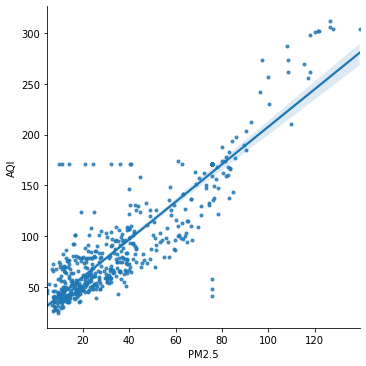

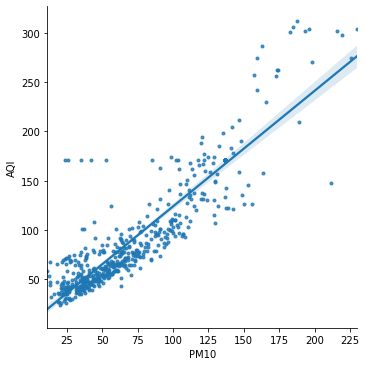

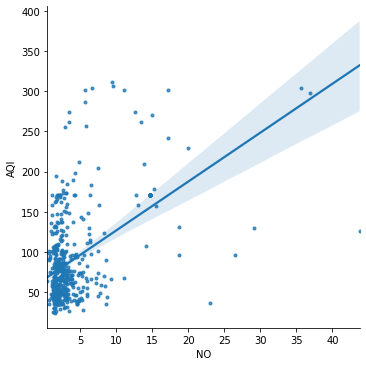

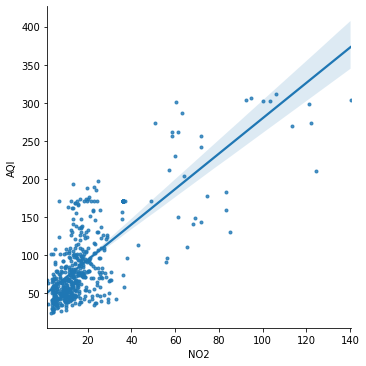

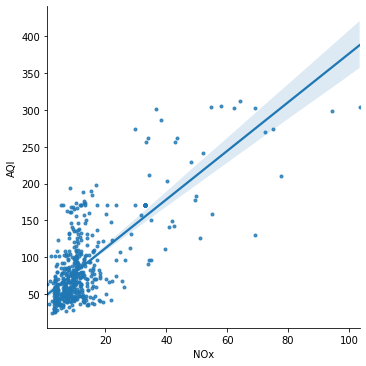

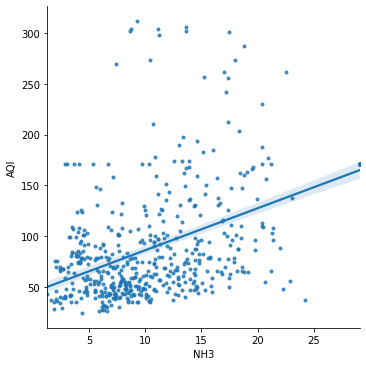

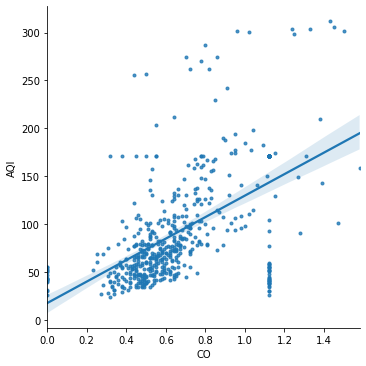

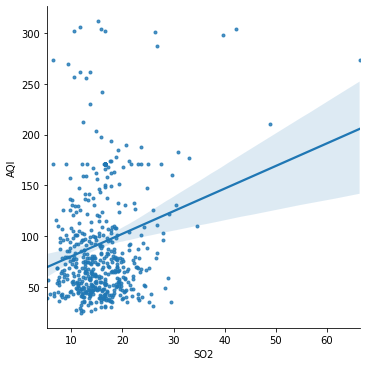

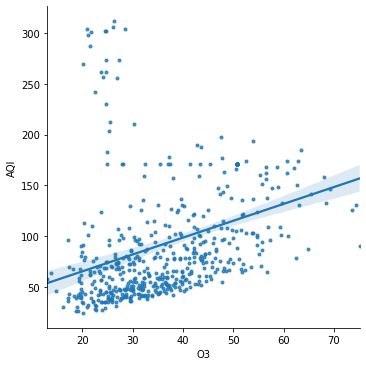

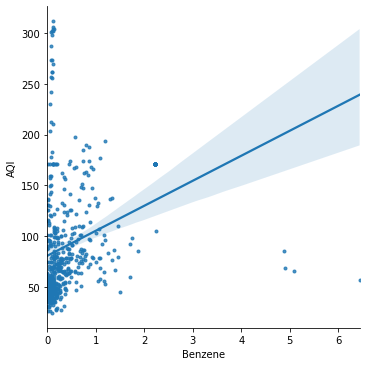

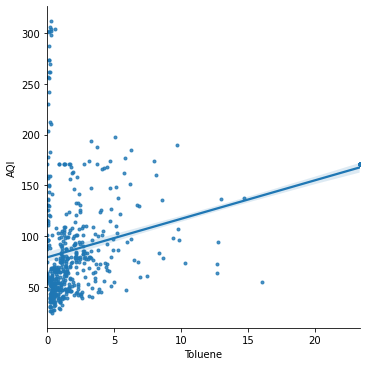

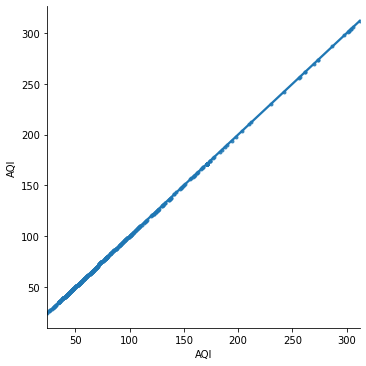

In [ ]:
col_=Dataid.columns.tolist()[2:]
for j in Dataid.columns.tolist()[2:]:
    sns.lmplot(x=j,y='AQI',data=Dataid,markers='.')


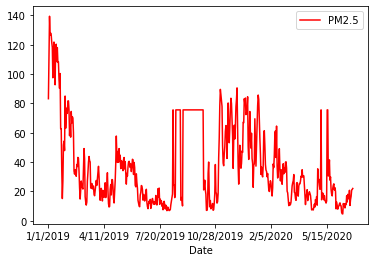

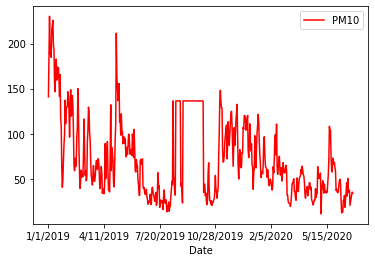

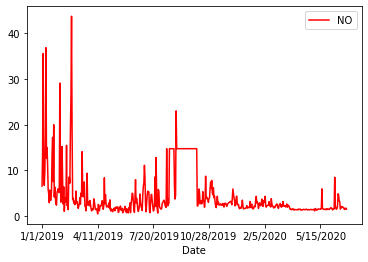

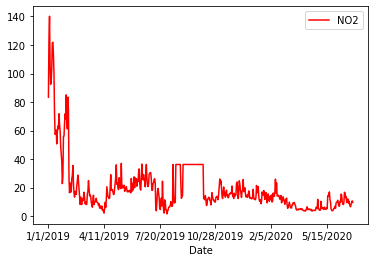

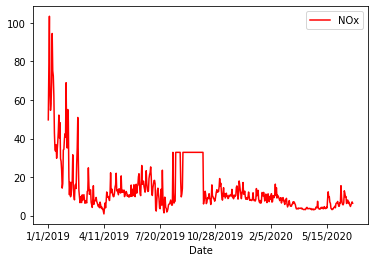

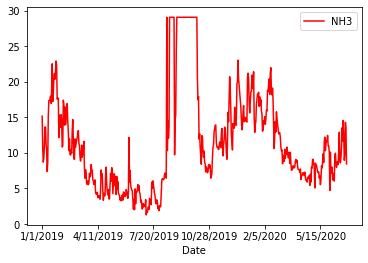

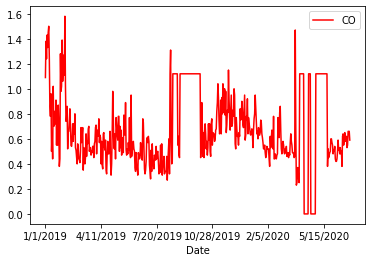

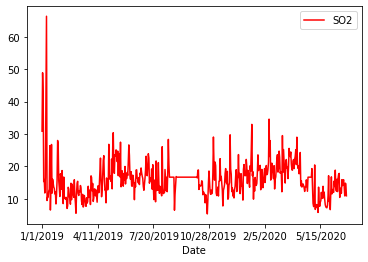

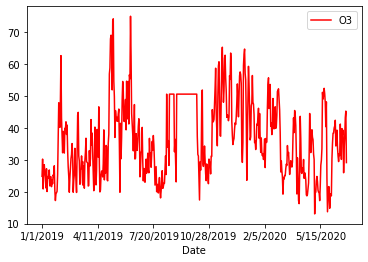

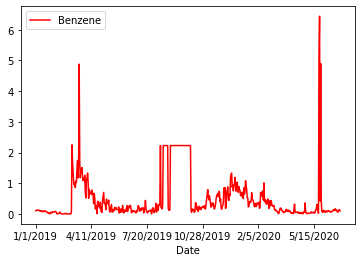

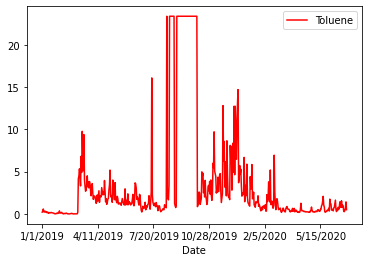

In [ ]:
pollt= ['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene']
for pollutant in pollt:
    Dataid.plot.line(x='Date', y=pollutant, color='red')

Text(0.5, 1.0, 'AQI Histogram')

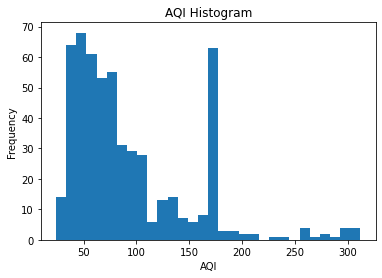

In [ ]:
Dataid["AQI"].plot.hist(bins=30)
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.title('AQI Histogram')

Aim 1:Compare the before and after lockdown AQI levels.

In [ ]:
Dataid['Date'] = pd.to_datetime(Dataid.Date)

postlock = Dataid.loc[Dataid['Date'] > '2020-03-23']
postlock = postlock.sort_values(by = 'Date')
postlock.shape

(100, 14)

In [ ]:
mask = (Dataid['Date']  < '2020-03-24')&(Dataid['Date']  > '2019-12-14')
prelock = Dataid.loc[mask]
prelock.shape

(100, 14)

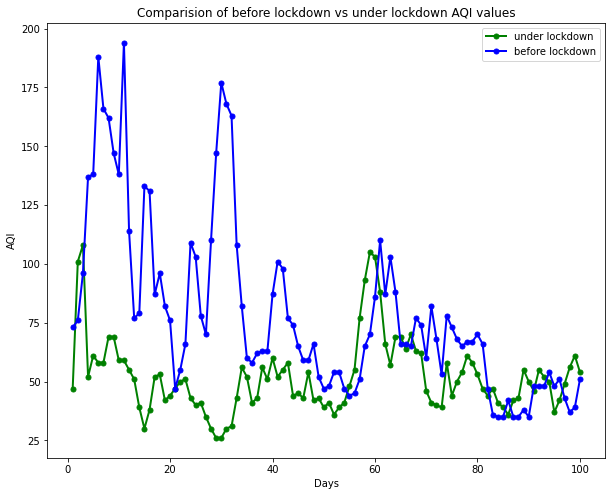

In [ ]:
dates = postlock['Date']
aqi_l = postlock['AQI']
aqi_l = [int(i) for i in aqi_l]

aqi_n = prelock['AQI']
aqi_n = [int(i) for i in aqi_n]

plt.figure(figsize=(10,8))
length = [i for i in range(1,len(dates)+1)]
plt.plot(length,aqi_l,linewidth=2, markersize=5,marker='o',color='green',label='under lockdown')
plt.plot(length,aqi_n,linewidth=2, markersize=5,marker='o',color='blue',label='before lockdown')
plt.legend()
plt.xlabel('Days')
plt.ylabel('AQI')
plt.title('Comparision of before lockdown vs under lockdown AQI values')
plt.show()

Aim 2:To be Forecast the AQI level of selected station.

In [ ]:
forecast=Dataid
forecast=forecast.drop('Date',axis=1)
forecast=forecast.drop('StationId',axis=1)
forecast=forecast.drop('AQI',axis=1)


In [ ]:
forecast.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene
0,83.17,140.90,6.56,83.38,49.69,15.16,1.09,30.85,24.84,0.10,0.21
1,109.97,189.28,13.93,124.57,77.59,10.65,1.38,48.92,30.25,0.11,0.25
2,139.38,230.27,35.59,140.17,103.49,8.70,1.24,42.26,20.87,0.13,0.58
3,126.47,187.83,9.48,106.10,64.14,9.27,1.43,15.29,26.24,0.12,0.25
4,127.94,196.30,6.73,92.41,54.63,11.10,1.33,15.90,28.51,0.11,0.31


In [ ]:
dep = Dataid['AQI']

In [ ]:
x_1,X_test,y_1,y_test = train_test_split(forecast,dep,test_size=.2)

In [ ]:
print(x_1.shape,y_1.shape)

(438, 11) (438,)


In [ ]:
print(X_test.shape,y_test.shape)

(110, 11) (110,)


In [ ]:
lreg = LinearRegression()
lreg.fit(x_1,y_1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lreg.score(X_test,y_test)

0.8976454139511447

In [ ]:
print('intercept:', lreg.intercept_)
print('slope:', lreg.coef_)

intercept: 22.643347262585266
slope: [ 0.78090644  0.50283533  2.4048298   2.14613285 -2.88706353 -0.25883105
  2.40699021 -0.33402665 -0.12576656  3.47219707  0.38042625]


In [ ]:
pred = lreg.predict(X_test)
pred[:5]

array([168.40917691, 168.40917691,  29.67368983,  38.19259436,
       168.40917691])

In [ ]:
y_test = np.squeeze(np.asarray(y_test)).flatten()
y_pred = np.squeeze(np.asarray(pred)).flatten()
#print(y_pred)
#print(y_test)

Text(0.5, 1.0, 'Forecasted Vs Actual')

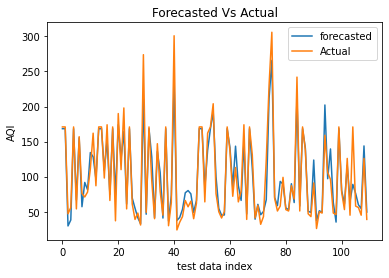

In [ ]:
# Plot of forecasted Values and Actual Values
plt.plot(y_pred,label="forecasted")
plt.plot(y_test,label="Actual")
plt.legend()
plt.xlabel('test data index')
plt.ylabel('AQI')
plt.title('Forecasted Vs Actual')

In [ ]:
mse1 = mean_squared_error(np.asarray(y_test), pred)
rmse1 = mse1**0.5
print(rmse1)

20.391464327004055


In [ ]:
print('R Square value: %.2f'%r2_score(y_test, pred))

R Square value: 0.90


Forecasting using Time Series Techniques:

In [ ]:
Dataid['Date'] = pd.to_datetime(Dataid.Date, format = '%m/%d/%Y')
data = Dataid.drop(['Date'], axis=1)
data.index = Dataid.Date

In [ ]:
split_date = '25-may-2020'
ts_train = data.loc[data.index <= split_date].copy()
ts_test = data.loc[data.index > split_date].copy()

In [ ]:
# Format data for prophet model using ds and y
ts_train.reset_index() \
    .rename(columns={'Date':'ds','AQI':'y'})

,ds,StationId,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,y
0,2019-01-01,AP001,83.17,140.90,6.56,83.38,49.69,15.16,1.090000,30.85,24.84,0.10,0.21,183.0
1,2019-01-02,AP001,109.97,189.28,13.93,124.57,77.59,10.65,1.380000,48.92,30.25,0.11,0.25,210.0
2,2019-01-03,AP001,139.38,230.27,35.59,140.17,103.49,8.70,1.240000,42.26,20.87,0.13,0.58,304.0
3,2019-01-04,AP001,126.47,187.83,9.48,106.10,64.14,9.27,1.430000,15.29,26.24,0.12,0.25,312.0
4,2019-01-05,AP001,127.94,196.30,6.73,92.41,54.63,11.10,1.330000,15.90,28.51,0.11,0.31,304.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,2020-05-21,AP001,27.66,102.68,1.43,11.41,6.96,8.65,1.119971,10.27,50.56,0.20,1.08,105.0
507,2020-05-22,AP001,29.90,103.68,1.47,10.11,6.40,11.55,0.380000,12.04,52.47,0.16,0.82,103.0
508,2020-05-23,AP001,21.15,72.04,1.51,4.87,3.81,12.22,0.520000,9.79,50.76,0.02,0.24,88.0
509,2020-05-24,AP001,18.09,60.29,1.41,4.20,3.39,10.29,0.450000,8.10,48.00,5.09,0.20,66.0


In [ ]:
# Setup and train model and fit
model = Prophet()
model.fit(ts_train.reset_index() \
          .rename(columns={'Date':'ds','AQI':'y'}))

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# Predict on training set with model
ts_test_fcst = model.predict(df=ts_test.reset_index() \
                                   .rename(columns={'Date':'ds'}))


In [ ]:
fut = list()
for i in range(7, 10):
	date = '2020-%7d' %i
	fut.append([date])
fut = DataFrame(fut)
fut.columns = ['ds']
fut['ds']= to_datetime(fut['ds'])
# use the model to make a forecast
forecasting = model.predict(fut)
#print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])


Text(0.5, 1.0, 'Forecasting of AQI')

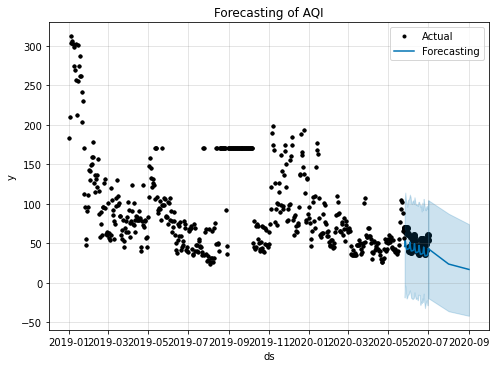

In [ ]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(7)
ax.scatter(ts_test.index, ts_test['AQI'], color='black')
fig = model.plot(ts_test_fcst, ax=ax)
fig1=model.plot(forecasting, ax=ax)
plt.legend(["Actual","Forecasting"])
plt.title("Forecasting of AQI")

In [ ]:
mse2=mean_squared_error(y_true=ts_test['AQI'],y_pred=ts_test_fcst['yhat'])
rmse2=mse2**0.5
print(rmse2)

13.584475137088384


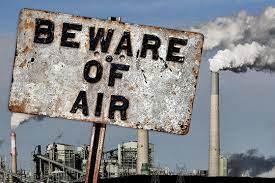